# Iris Clustering (Simulasi ke - 3)

## Penjelasan Kolom:

## A. Data Preparation

### A.1 Import Library

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Membaca 5 data teratas dan 5 data terbawah

In [17]:
try:
 df = pd.read_csv('iris.csv')
 print("Berhasil Membaca data")
except Exception as e:
 print(f"Gagal Membaca data as {e}")

Berhasil Membaca data


In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### A.3 Melihat Informasi Data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### A.4 Melihat Dimensi Data

In [20]:
df.shape

(150, 6)

### A.5 Cek data duplikat

In [21]:
df.duplicated().sum()

np.int64(0)

### A.6 Cek Nilai yang hilang

In [22]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### A.7 Cek Nilai Outlier

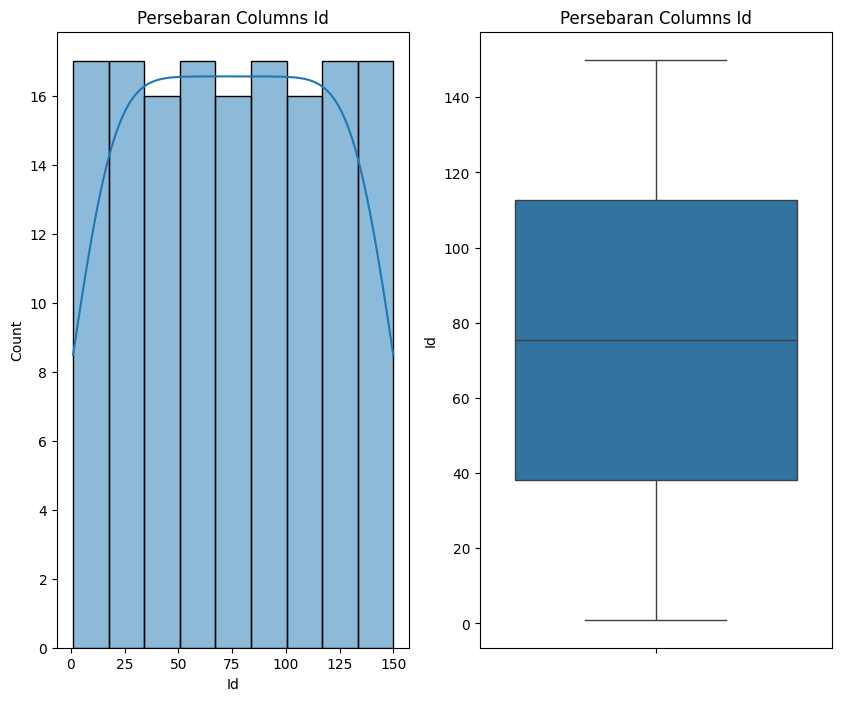

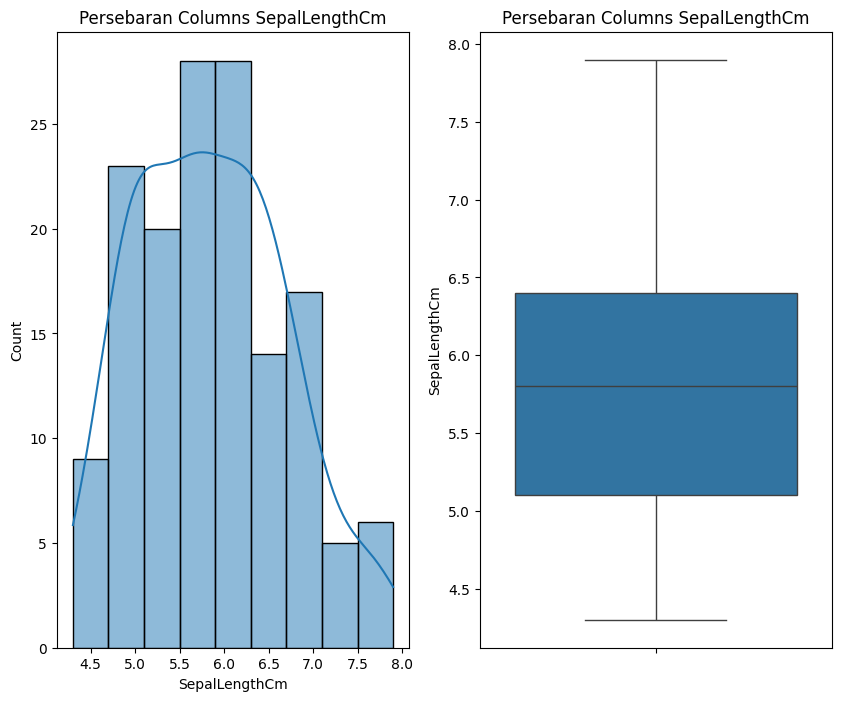

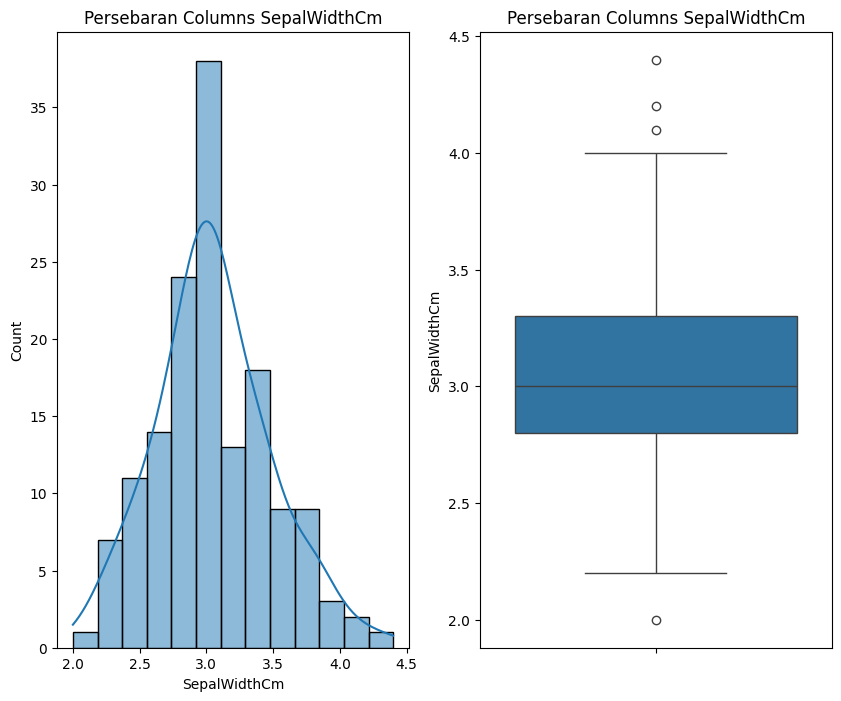

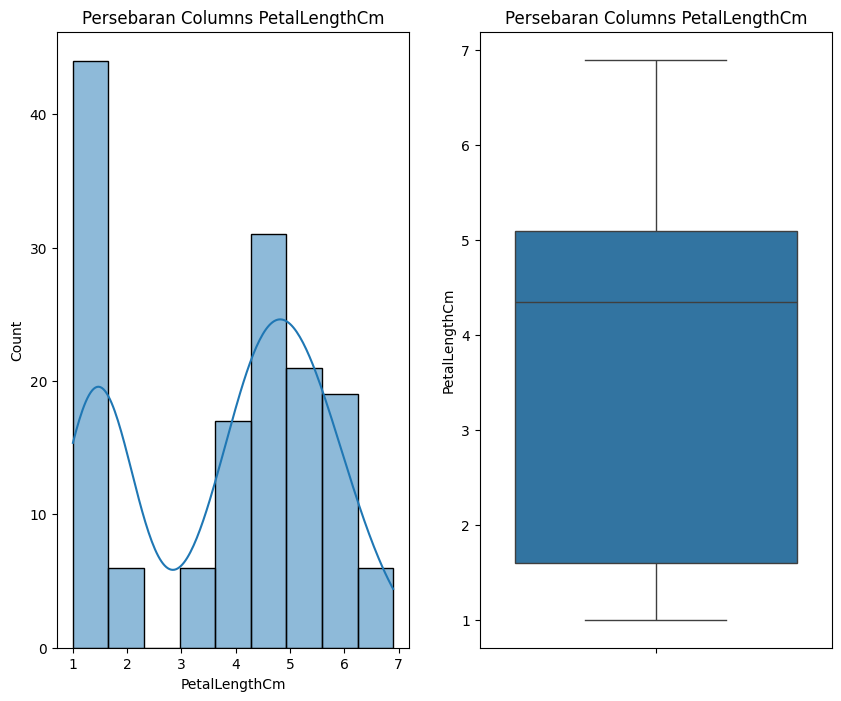

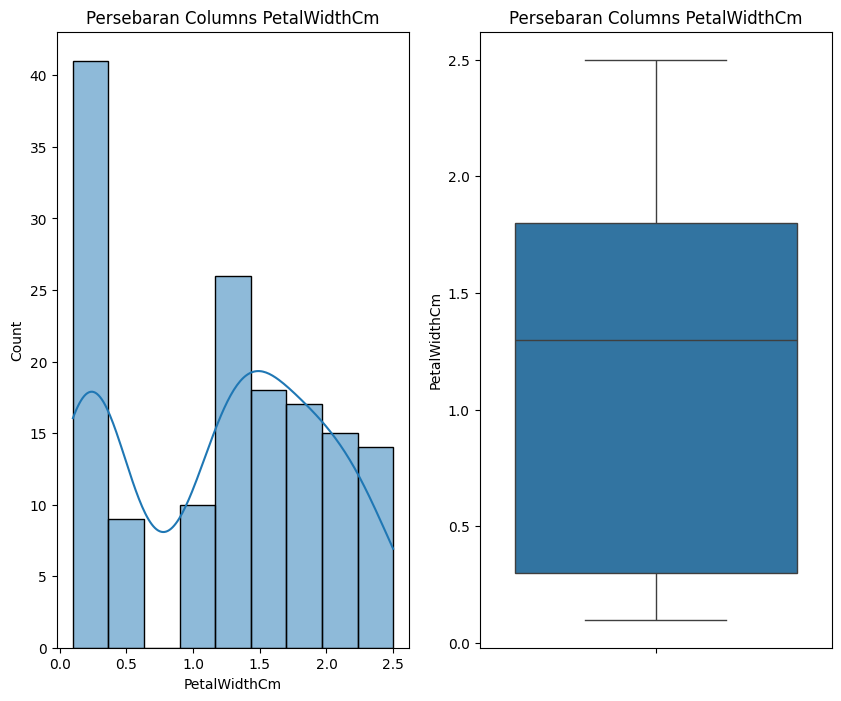

In [28]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col],kde = True, ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

### A.8 Cek Statistik Data

In [29]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Id,150.00,75.50,43.45,1.00,38.25,75.50,112.75,150.00
SepalLengthCm,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
SepalWidthCm,150.00,3.05,0.43,2.00,2.80,3.00,3.30,4.40
PetalLengthCm,150.00,3.76,1.76,1.00,1.60,4.35,5.10,6.90
PetalWidthCm,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


## B. Data Preprocessing

### B.1 Handling Outlier

In [36]:
df = df.drop(columns=['Id'])

In [30]:
 q1 = df['SepalWidthCm'].quantile(0.25)
 q3 = df['SepalWidthCm'].quantile(0.75)

 q1, q3

(np.float64(2.8), np.float64(3.3))

In [ ]:
iqr = q3 - q1
iqr

np.float64(0.5)

In [32]:
low = q1 - 1.5 * iqr
up =  q3 + 1.5 * iqr

low, up

(np.float64(2.05), np.float64(4.05))

In [73]:
outlier = df[(df['SepalWidthCm'] < low) | (df['SepalWidthCm'] > up)]

outlier

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [ ]:
#df = df[(df['SepalWidthCm'] > low) & (df['SepalWidthCm'] < up)]

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

In [50]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

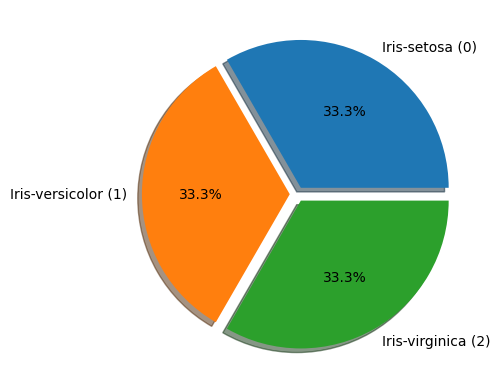

In [54]:
label = ['Iris-setosa (0)', 'Iris-versicolor (1)', 'Iris-virginica (2)']


df['Species'].value_counts().plot(
 kind='pie',
 labels = label,
 autopct='%1.1f%%',
 shadow = True,
 explode = (0.05, 0.05, 0.05),
 )

plt.ylabel("")
plt.show()

In [42]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

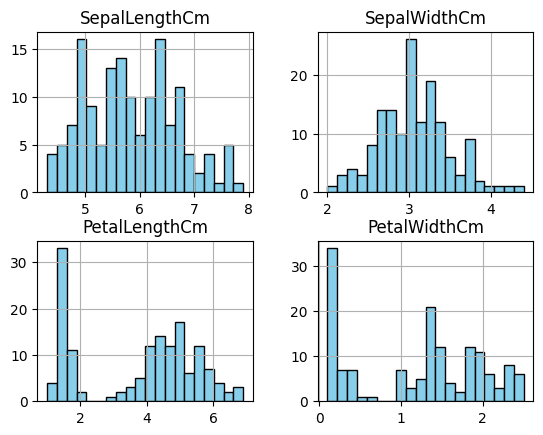

In [43]:
df.select_dtypes(include='number').hist(bins =20, color='skyblue', edgecolor='black')

### C.2 Bivariate Analysis

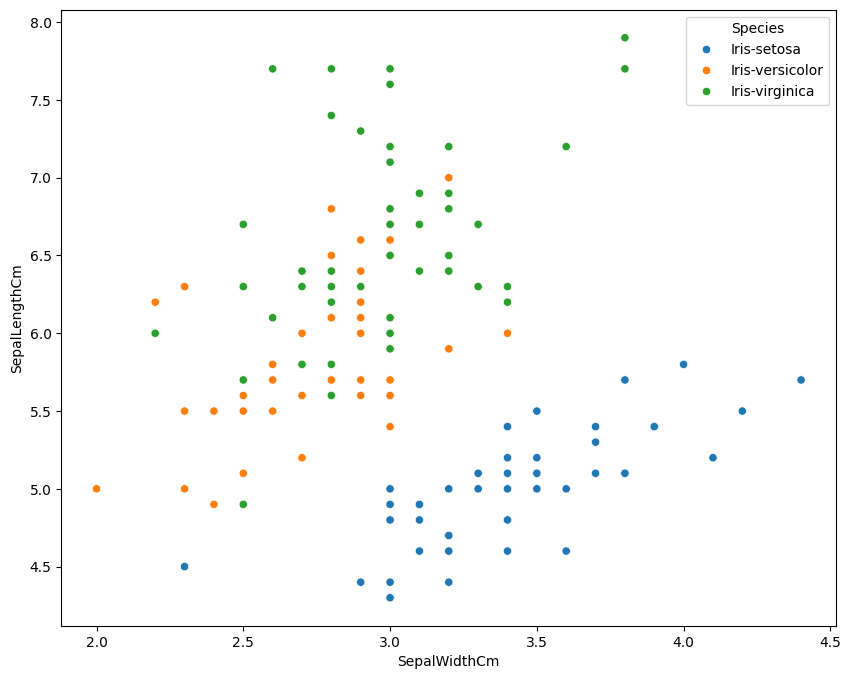

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')
plt.show()

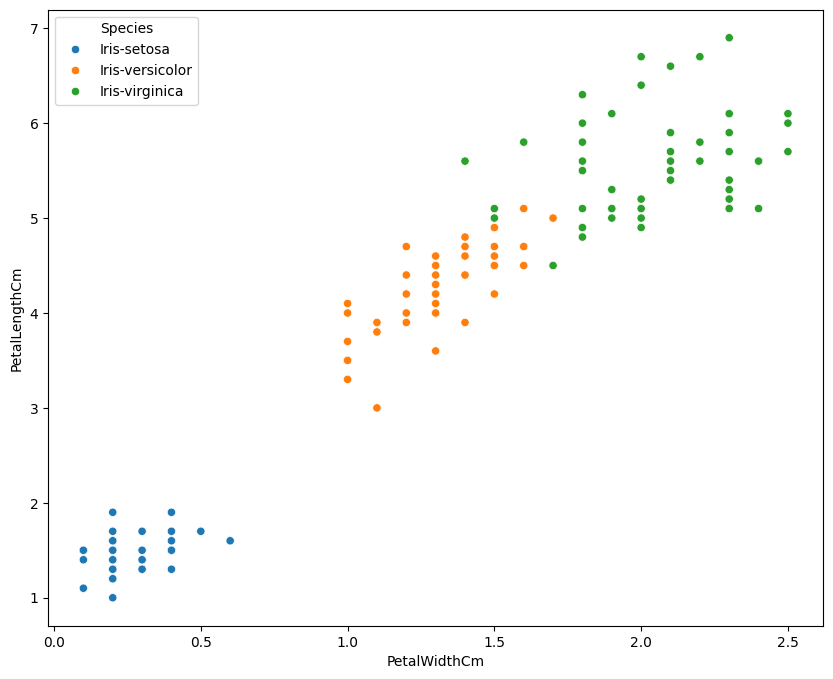

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.show()

### C.3 Multivariate Analysis

In [68]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

df['Species'] = df['Species'].map(mapping) 

<Axes: >

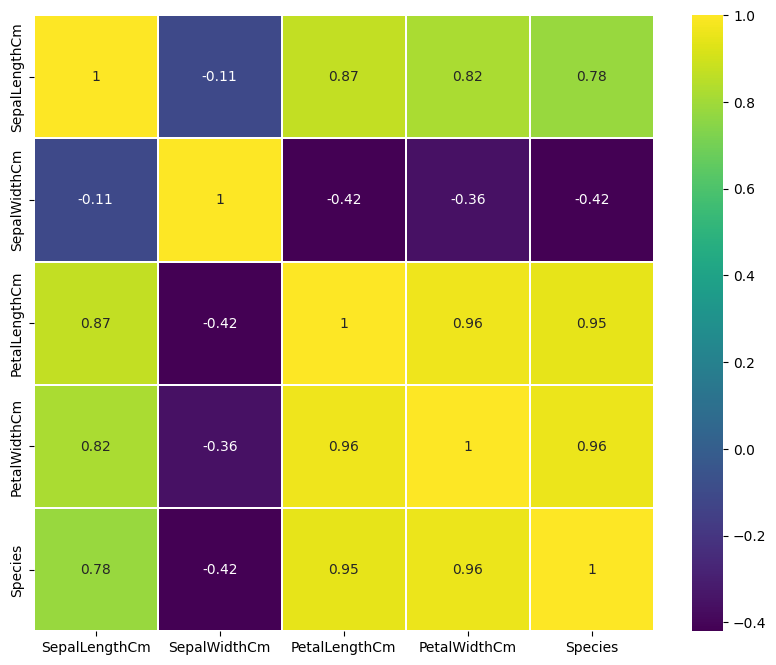

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),
annot = True,
cmap='viridis',
linewidth = 1.1)

In [75]:
def calc_sscore(df, k):
 clusters, centroid = kmeans_plusplus(df, k)
 sscore = []

 for i in range(len(df)):
  ci = clusters[i]

  samecp = df[clusters == ci].to_numpy()
  ai = np.mean(np.linalg.norm(samecp - df.iloc[i].to_numpy(), axis = 1))

  distances_to_otherc = []
  for j in range(k):
   if j != ci:
    othercp = df[clusters == j].to_numpy()
    bi_temp = np.mean(np.linalg.norm(othercp - df.iloc[i].to_numpy(), axis = 1))
    distances_to_otherc.append(bi_temp)
  
  bi = np.min(distances_to_otherc)
  sscore_i = (bi - ai) / max(ai, bi)
  sscore.append(sscore_i)

 avg_max = np.mean(sscore)
 return avg_max

In [ ]:
# plt.scatter(
#  centroids[:, 0], centroids[:, 1],
#  c = 'red', marker='X', s=200,
#  labels = 'Centroids'
#  edgecolor = 'black'
# )

In [ ]:
# clusters = df_paca['cluster'].value_counts()

# label = ['cluster (0)', 'cluster (1)', 'cluster (2)']

# plt.pie(cluster,
# labels = label,
# autopct="%1.1f%%",
# shadow = True,
# rectangle = 90,
# explode = (0.05, 0.05, 0.05))